In [1]:
# Importing the necessary libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import mysql.connector





In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pip install mysql-connector

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')
print(connection)

In [ ]:
## getting the database name
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)



In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [7]:
query = 'select * from data '

In [8]:
df= pd.read_sql(query,connection)

In [9]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [10]:
df.shape

(7422, 9)

In [11]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [12]:
df.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [14]:
df['Status'].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [15]:
df['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [16]:
df['Location'].unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [17]:
df['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [18]:
df['Source'].unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [19]:
df['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [20]:
df['Product_ID'].unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [21]:
df['Product_ID'].value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [22]:
##Remove unwanted data in columns

In [23]:
df.drop(['Mobile'],axis=1,inplace=True)
df.drop(['EMAIL'],axis=1,inplace=True)
df.drop(['Created'],axis=1,inplace=True)


In [24]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open


In [25]:
df.replace('',np.nan,inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df.shape

(7328, 6)

In [26]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [27]:
df.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live platforms',inplace=True)
df.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing client',inplace=True)
df.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
df.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [28]:
df.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign places',inplace=True)
df.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other places',inplace=True)

df.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Low sold',inplace=True)


df.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)


In [29]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live platforms,Sales-Agent-3,Bangalore,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,Other places,Mode-1,Good
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good


<AxesSubplot:>

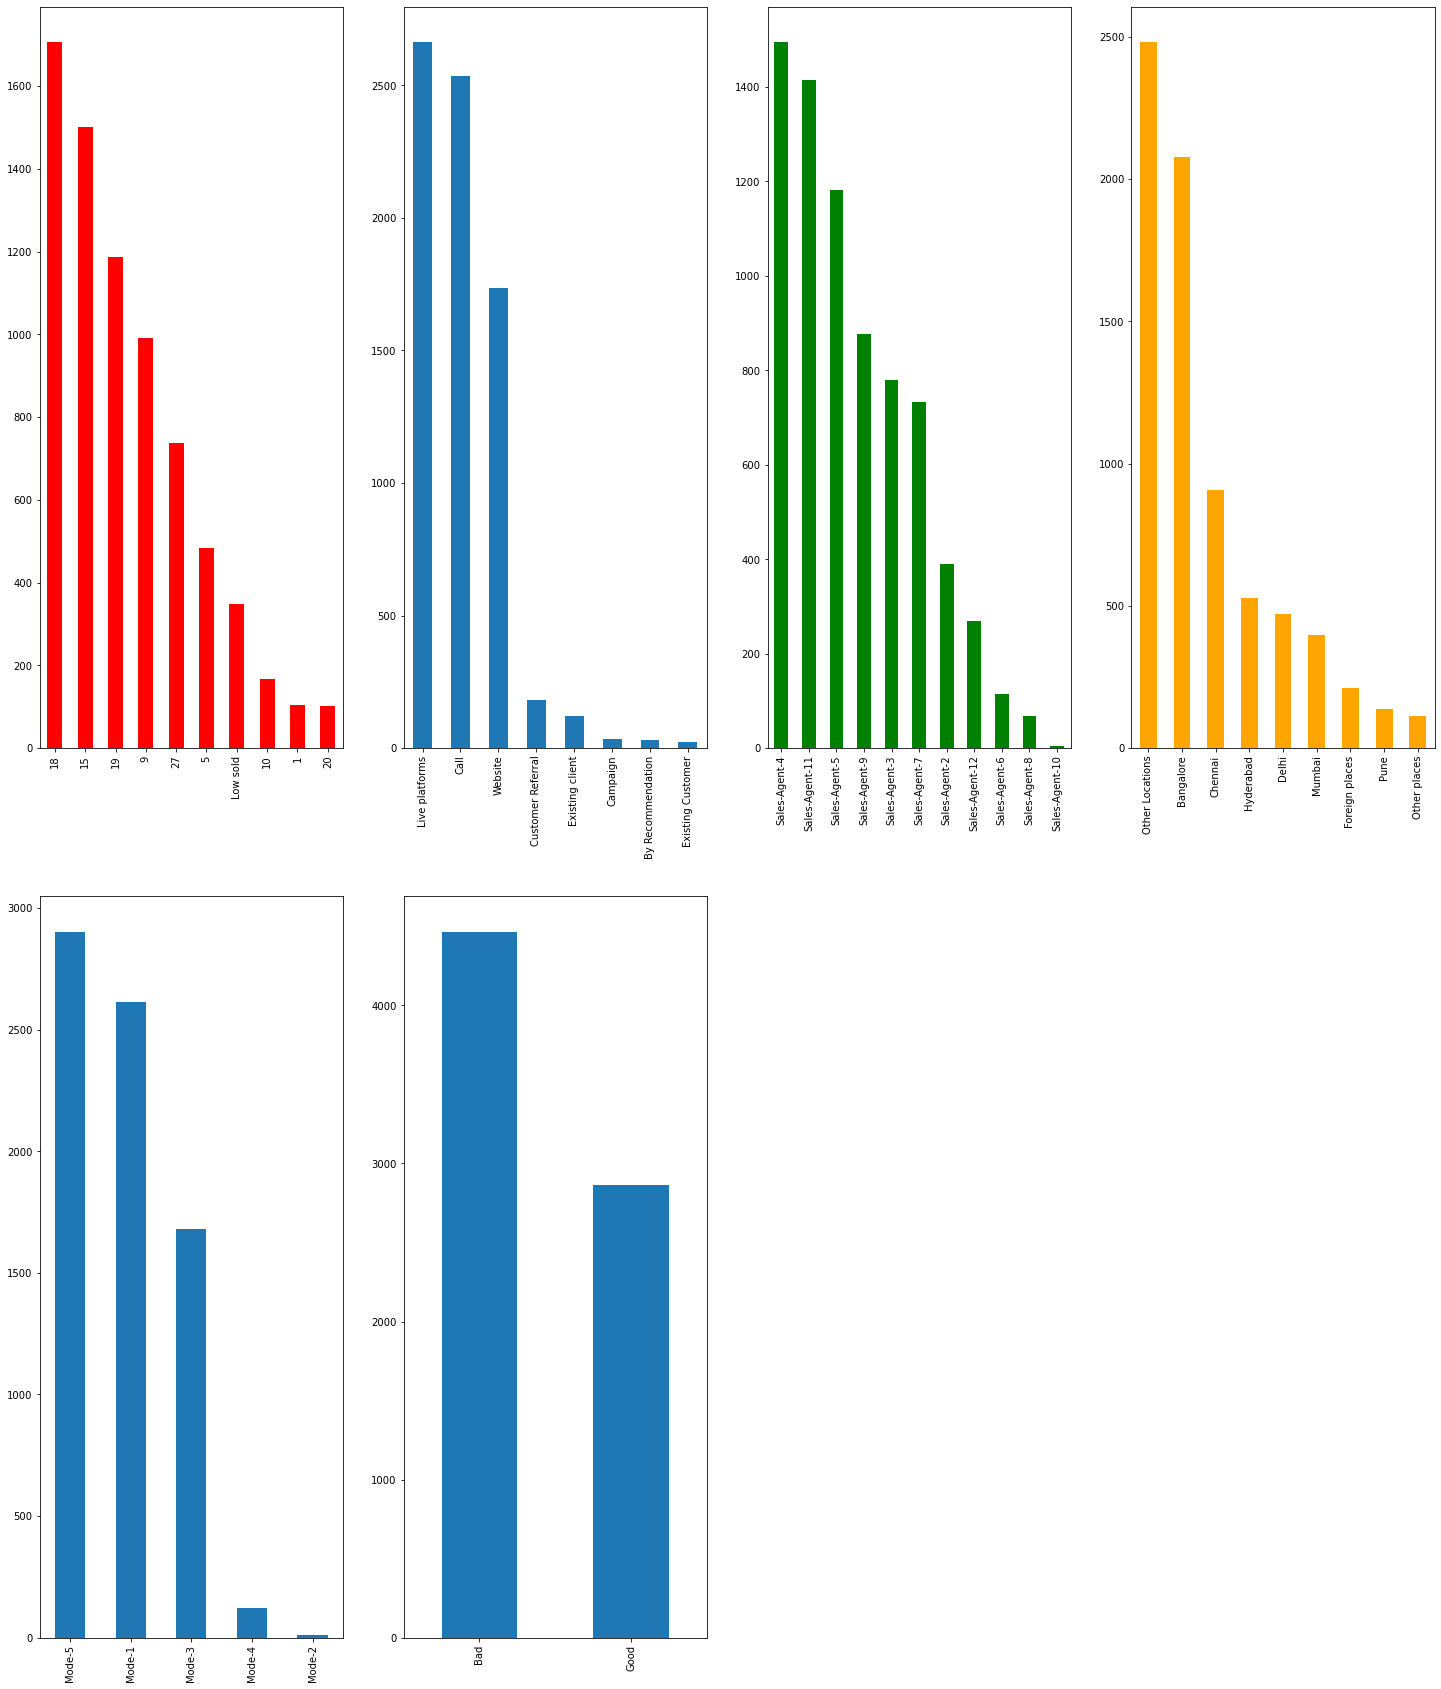

In [30]:
# Plotting the labels in each column
plt.figure(figsize=(25,30))
plt.subplot(2,4,1)
df.Product_ID.value_counts().plot(kind='bar',color='red')
plt.subplot(2,4,2)
df.Source.value_counts().plot(kind='bar')
plt.subplot(2,4,3)
df.Sales_Agent.value_counts().plot(kind='bar',color='green')
plt.subplot(2,4,4)
df.Location.value_counts().plot(kind='bar',color='orange')
plt.subplot(2,4,5)
df.Delivery_Mode.value_counts().plot(kind='bar')
plt.subplot(2,4,6)
df.Status.value_counts().plot(kind='bar')


In [31]:
# Label encoding all the columns
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,8,6,4,0,0,1
1,4,1,5,6,4,1
2,3,7,1,7,0,1
3,2,7,8,4,0,0
4,3,1,8,0,0,1


In [32]:
df.shape

(7328, 6)

In [33]:
# Checking the correlation coeffecient
df.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.072447,0.056065,-0.221145,-0.181464,0.138943
Source,0.072447,1.000000,-0.023904,0.006056,-0.214237,-0.023927
Sales_Agent,0.056065,-0.023904,1.000000,-0.140858,-0.224688,0.137074
Location,-0.221145,0.006056,-0.140858,1.000000,0.410122,-0.343020
Delivery_Mode,-0.181464,-0.214237,-0.224688,0.410122,1.000000,-0.220445
Status,0.138943,-0.023927,0.137074,-0.343020,-0.220445,1.000000


(6.5, -0.5)

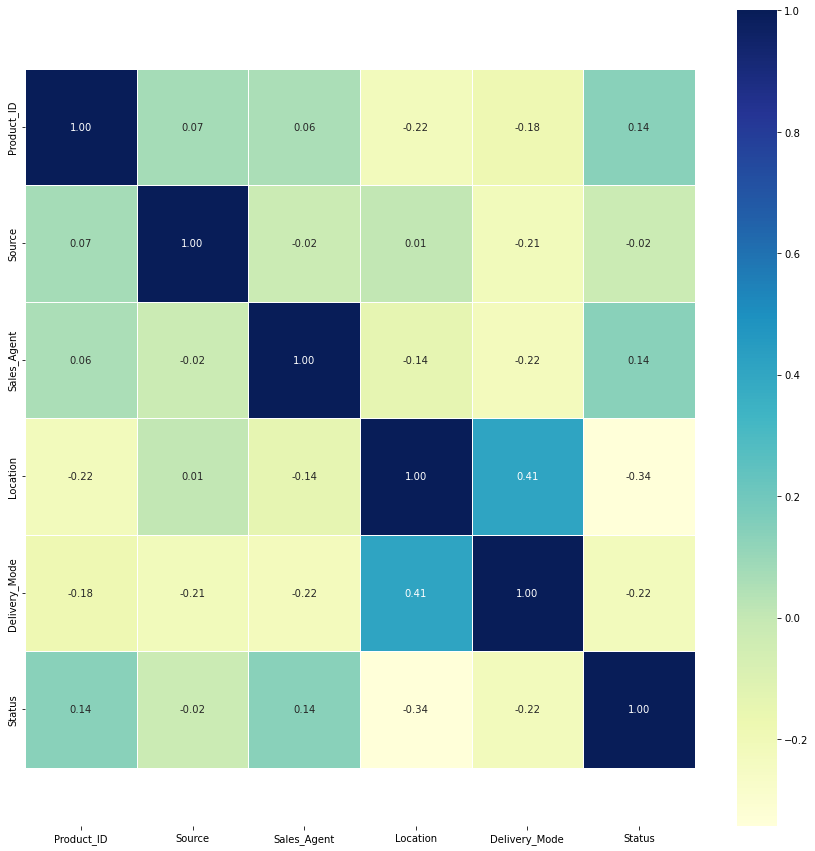

In [34]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [35]:
y = df.Status
X = df.iloc[:, :-1]

In [36]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,8,6,4,0,0
1,4,1,5,6,4
2,3,7,1,7,0
3,2,7,8,4,0
4,3,1,8,0,0


In [37]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Status, dtype: int32

Logistic Regression

In [38]:
y = df.Status
X = df.iloc[:, :-1]

In [39]:
#Splitting into training and testing data for accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [40]:
X_train.shape

(5862, 5)

In [41]:
X_test.shape

(1466, 5)

In [42]:
y_train.shape

(5862,)

In [43]:
y_test.shape

(1466,)

In [44]:
y_train.value_counts

<bound method IndexOpsMixin.value_counts of 3947    0
3083    0
288     1
7206    0
1200    0
       ..
1428    1
6537    1
7068    0
4367    1
2522    1
Name: Status, Length: 5862, dtype: int32>

In [45]:
! pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [46]:
# SMOTE for sampling technique
smote = SMOTE()

In [47]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [48]:
y_train_smote.value_counts()

0    3580
1    3580
Name: Status, dtype: int64

### MODELS

### 1. Logistic Regression

In [49]:
y = df.Status
X = df.iloc[:, :-1]

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1800)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1800)

In [51]:
X_test.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
4742,3,6,5,0,0
5440,7,1,1,7,4


In [52]:
y_predict = model.predict(X_test)

In [53]:
y_predict

array([1, 0, 0, ..., 0, 1, 0])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.6596180081855388

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[658, 228],
       [271, 309]], dtype=int64)

In [56]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Status,,
0,658,228
1,271,309


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       886
           1       0.58      0.53      0.55       580

    accuracy                           0.66      1466
   macro avg       0.64      0.64      0.64      1466
weighted avg       0.66      0.66      0.66      1466



### 2. Support Vector Machine

In [58]:
from sklearn.svm import SVC
parameters = {'kernel': ['rbf'], 'gamma': [0.1,1,5], 'C': [0.1,1,10,100]}
rbf_svc = RandomizedSearchCV(SVC(),parameters).fit(X_train,y_train)

In [59]:
rbf_svc.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 1}

In [62]:
y_predict_svm = rbf_svc.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score ,classification_report
accuracy_score(y_test,y_predict_svm)

0.6950886766712142

In [64]:
pd.crosstab(y_test,y_predict_svm)

col_0,0,1
Status,,
0,701,185
1,262,318


In [65]:
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       886
           1       0.63      0.55      0.59       580

    accuracy                           0.70      1466
   macro avg       0.68      0.67      0.67      1466
weighted avg       0.69      0.70      0.69      1466



### 3. Random Forest classifier with GridSearchCV

In [66]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [67]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 2}

In [68]:
y_predict_rf = model_gridrf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score ,classification_report
accuracy_score(y_test,y_predict_rf)

0.7128240109140518

In [70]:
pd.crosstab(y_test,y_predict_rf)

col_0,0,1
Status,,
0,698,188
1,233,347


In [71]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       886
           1       0.65      0.60      0.62       580

    accuracy                           0.71      1466
   macro avg       0.70      0.69      0.70      1466
weighted avg       0.71      0.71      0.71      1466



### 4 Naive Bayes Model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB( priors=None, var_smoothing=1)
classifier.fit(X_train, y_train)
y_predict1  =  classifier.predict(X_test)
y_predict

array([1, 0, 0, ..., 0, 1, 0])

In [73]:
classifier.get_params

<bound method BaseEstimator.get_params of GaussianNB(var_smoothing=1)>

In [74]:
Score = classifier.score(X_train, y_train)
Score

0.6676902081200955

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_predict1)
accuracy_score(y_test,y_predict1)

0.6637107776261937

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict1)

array([[765, 121],
       [372, 208]], dtype=int64)

In [77]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76       886
           1       0.63      0.36      0.46       580

    accuracy                           0.66      1466
   macro avg       0.65      0.61      0.61      1466
weighted avg       0.66      0.66      0.64      1466



### 5 Decision Tree with GridSearchCV

In [78]:
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [79]:
model_griddtree.best_params_

{'criterion': 'gini', 'min_samples_split': 3}

In [80]:
y_predict_dtree = model_griddtree.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score ,classification_report
accuracy_score(y_test,y_predict_dtree)

0.689631650750341

In [82]:
pd.crosstab(y_test,y_predict_dtree)

col_0,0,1
Status,,
0,698,188
1,267,313


In [83]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       886
           1       0.65      0.60      0.62       580

    accuracy                           0.71      1466
   macro avg       0.70      0.69      0.70      1466
weighted avg       0.71      0.71      0.71      1466



### 6 K-NEAREST NEIGBHOR

In [84]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [85]:
y_predict_kn = model_knn.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score ,classification_report
accuracy_score(y_test,y_predict_kn)

0.6882673942701227

In [87]:
pd.crosstab(y_test,y_predict_kn)

col_0,0,1
Status,,
0,737,149
1,308,272


In [88]:
print(classification_report(y_test,y_predict_kn))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       886
           1       0.65      0.47      0.54       580

    accuracy                           0.69      1466
   macro avg       0.68      0.65      0.65      1466
weighted avg       0.68      0.69      0.68      1466



### Overall modelperformance

In [1]:
Model_performance = [['LR', 0.659], ['SVM', 0.695], ['RF', 0.712], ['NB', 0.663], ['DT', 0.689], ['KNN', 0.688]]

In [4]:
import pandas as pd

In [5]:
df1 =  pd.DataFrame(Model_performance, columns = ['Model', 'Accuracy_score'])
df1

,Model,Accuracy_score
0,LR,0.659
1,SVM,0.695
2,RF,0.712
3,NB,0.663
4,DT,0.689
5,KNN,0.688


In [6]:
x1= df1.loc(0)
y1=df1.loc(1)

In [7]:
import matplotlib.pyplot as plot

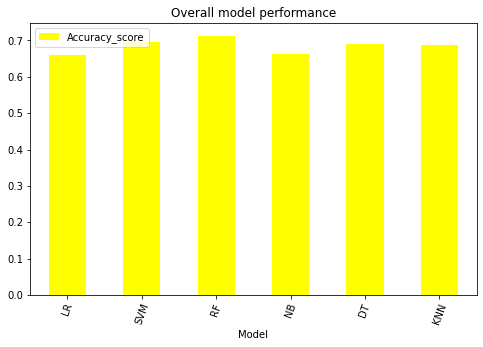

<Figure size 432x288 with 0 Axes>

In [8]:
df1.plot.bar(x="Model", y="Accuracy_score", rot=70, figsize=(8,5), color='yellow',title="Overall model performance")
plot.show(block=True)
plot.show()
plot.savefig('Overall model performance.png')

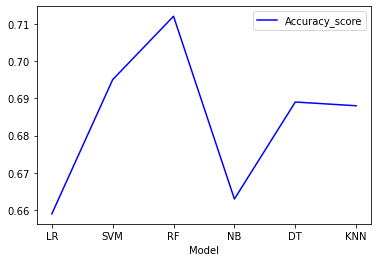

In [10]:
df1.plot(x ='Model', y='Accuracy_score', kind = 'line',color='blue')
plot.show()

<AxesSubplot:>

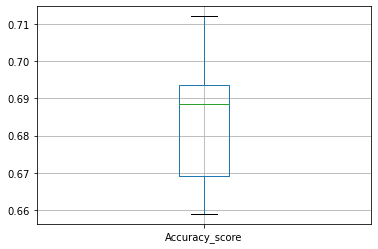

In [11]:
df1.boxplot()